2021.08.25 禽流感資訊圖卡素材

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import plotly.express as px
import plotly.graph_objects as go

In [2]:
# 案例場資料
file_path = r"G:\我的雲端硬碟\work\2021\1.農試所_大禽流感專案\1.資料\案例場資料_高博提供\20210806確診案例 for EMCT.xlsx"
df = pd.read_excel(file_path ,usecols = "A:Y" ,engine='openpyxl')

# 拿掉中文欄位名稱
df.drop(df.index[0], inplace=True)

# 時間變數製作
df.loc[:, "sample_date"] = pd.to_datetime(df.loc[:, "sample_date"])
df.loc[:, "sample_date_year"] = df.loc[:, "sample_date"].dt.year
df.loc[:, "sample_date_month"] = df.loc[:, "sample_date"].dt.month

In [3]:
#篩選
df = df[df["AI_1"].isin(["HPAI"])] #  HPAI
print(len(df))

1415


In [4]:
df["sample_date_year"].value_counts()

2015    944
2017    182
2018     98
2019     84
2020     58
2016     37
2021     12
Name: sample_date_year, dtype: int64

In [5]:
# 依照 各年、各縣市、各月份 加總
# date_mask = (df['sample_date'] >= '2020-9-30') & (df['sample_date'] <= '2021-10-1')
# df_pic = df[date_mask] #篩選年分

df_pic = df[df["sample_date_year"].isin([2020,2021])] #篩選年分

group_cols = ["countyname", "sample_date_month"]
df_group = df_pic[group_cols+["AI_1"]].groupby(group_cols, as_index=False).count()
df_group.rename(columns={"AI_1":"count"}, inplace=True)
# df_group

In [6]:
df_group[["sample_date_month","count"]].groupby(["sample_date_month"]).sum()

,count
sample_date_month,
1,15
2,12
3,11
4,7
5,3
6,2
7,5
8,6
9,2


In [91]:
print(df_group["count"].sum())
(df_group[["countyname","count"]].groupby(["countyname"]).sum()/(df_group["count"].sum()))*100


70


,count
countyname,
嘉義縣,1.428571
屏東縣,12.857143
彰化縣,11.428571
臺中市,1.428571
臺南市,10.000000
雲林縣,61.428571
高雄市,1.428571


In [146]:
trand_df = df_pic[["sample_date_year", "sample_date_month","AI_1"]].groupby(["sample_date_year", "sample_date_month"], as_index=False).count()
trand_df = trand_df.append(pd.DataFrame([{"sample_date_year":2020,"sample_date_month":10,"AI_1":0}
                                         ,{"sample_date_year":2021,"sample_date_month":8,"AI_1":0}]))
# trand_df["Time"] = trand_df["sample_date_year"].astype(str) + "年" + trand_df["sample_date_month"].astype(str) + "月"
trand_df["Time"] = trand_df["sample_date_month"].astype(str) + "月"
trand_df.sort_values(by=["sample_date_year","sample_date_month"], inplace=True)
trand_df

,sample_date_year,sample_date_month,AI_1,Time
0,2020,1,13,1月
1,2020,2,10,2月
2,2020,3,8,3月
3,2020,4,6,4月
4,2020,5,1,5月
5,2020,6,1,6月
6,2020,7,4,7月
7,2020,8,6,8月
8,2020,9,2,9月
0,2020,10,0,10月


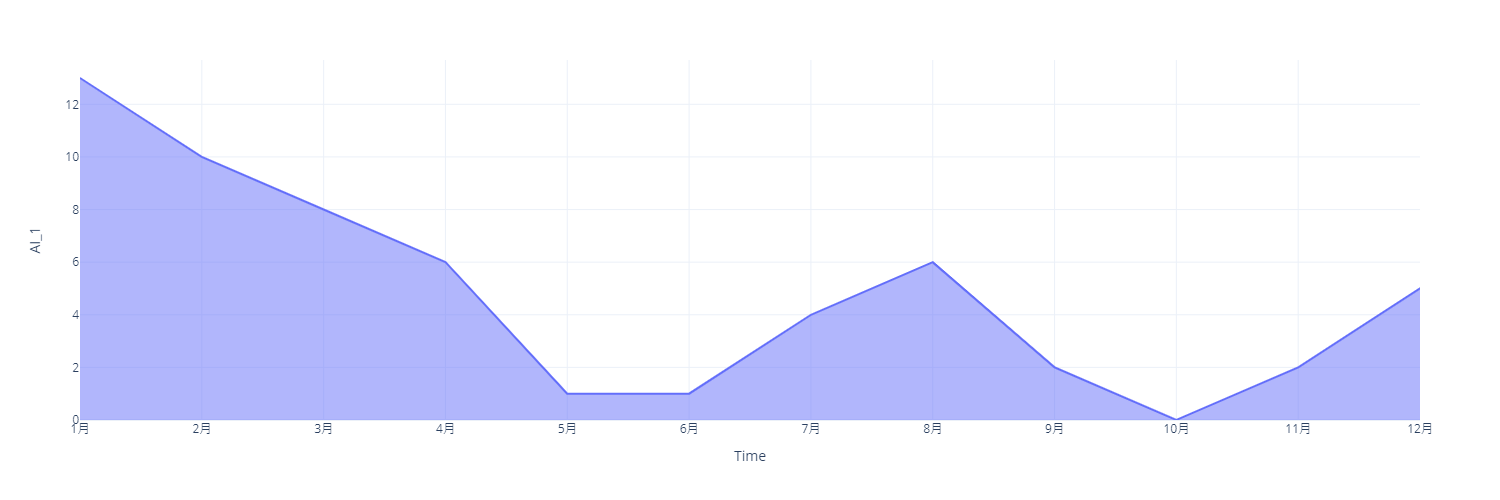

In [143]:
fig = px.area(trand_df[trand_df["sample_date_year"].isin([2020])], x="Time", y='AI_1', template="plotly_white",width=1500, height=500)
fig.show()
# fig.show(renderer="svg")
fig.write_image("trand_2020.svg")

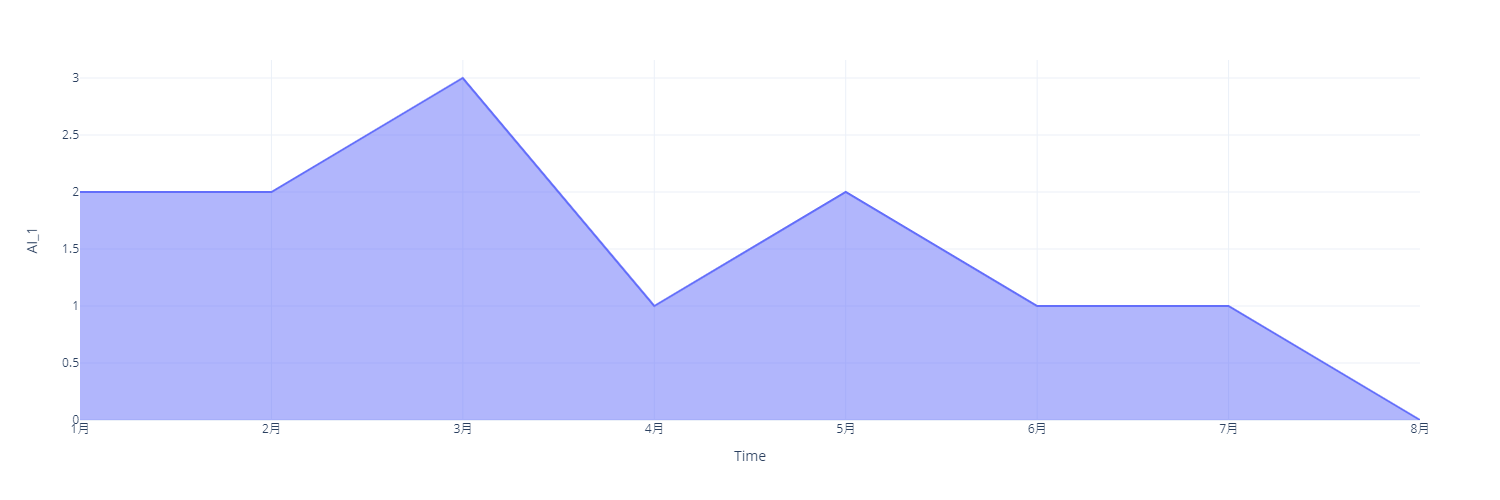

In [147]:
fig = px.area(trand_df[trand_df["sample_date_year"].isin([2021])], x="Time", y='AI_1', template="plotly_white",width=1500, height=500)
fig.show()
# fig.show(renderer="svg")
fig.write_image("trand_2021.svg")

# Barpolar

In [380]:
my_color_lst = ["#BD6D0E","#014760", "#FFC734", "#F15A23", "#00ADEF", "#86B157","#9EBCDE"]

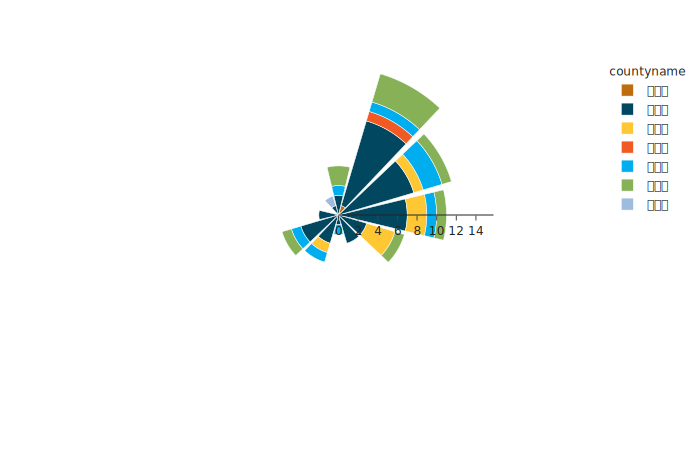

In [382]:
import plotly.express as px
df_group.loc[:,"direction"] = df_group.loc[:, "sample_date_month"]*(360/12)  # 將月份轉化為方向
df_group.sort_values(by=["countyname"], ascending=[0], inplace=True) # 排序縣市名

fig = px.bar_polar(df_group, r="count", theta="direction", hover_name="sample_date_month",
                   color="countyname", template="simple_white", 
                   color_discrete_sequence= my_color_lst
                  )

fig.update_polars(
#     radialaxis_tickfont_size=1,
    angularaxis_visible=False,
    angularaxis_linewidth=0,
#     angularaxis_showline=False,
#     angularaxis_showticklabels=False,
#     radialaxis_color="white"

)
# px.colors.qualitative.Alphabet
#  px.colors.sequential.Plasma_r
# template: https://plotly.com/python/templates/
# color_discrete_sequence: https://plotly.com/python/builtin-colorscales/
# color_discrete_sequence: https://plotly.com/python/discrete-color/
# https://plotly.com/python/reference/layout/polar/

fig.show(renderer="svg")
fig.write_image("Barpolar.svg") # 黑線部分 可以存成 SVG 用 Figma編輯修掉
fig.write_html("Barpolar.html")

# ebird

In [290]:
ebird_path = r"G:\我的雲端硬碟\work\2021\1.農試所_大禽流感專案\1.資料\ebird\ebirds_risk.json"
df_ebird = pd.read_json(ebird_path,lines=True)
df_ebird.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14373 entries, 0 to 14372
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               14373 non-null  object 
 1   checklistId       14373 non-null  object 
 2   comName           14373 non-null  object 
 3   countryCode       14373 non-null  object 
 4   countryName       14373 non-null  object 
 5   createdAt         14373 non-null  object 
 6   firstName         14372 non-null  object 
 7   hasComments       14373 non-null  bool   
 8   hasRichMedia      14373 non-null  bool   
 9   howMany           13196 non-null  float64
 10  lastName          14372 non-null  object 
 11  lat               14373 non-null  float64
 12  lng               14373 non-null  float64
 13  locId             14373 non-null  object 
 14  locName           14373 non-null  object 
 15  locationPrivate   14373 non-null  bool   
 16  obsDt             14373 non-null  object

In [300]:
df_ebird.head()

,_id,checklistId,comName,countryCode,countryName,createdAt,firstName,hasComments,hasRichMedia,howMany,...,sciName,speciesCode,subId,subnational1Code,subnational1Name,updatedAt,userDisplayName,date,year,month
0,OBS719399449,CL23837,Green-winged Teal,TW,Taiwan,{'$date': '2020-03-26T11:25:50.948Z'},中華鳥會,False,False,80.0,...,Anas crecca,gnwtea,S53445397,TW-ILA,Yilan County,{'$date': '2020-03-26T11:25:50.948Z'},中華鳥會 鳥類紀錄資料庫,2020-03-26 11:25:50.948000+00:00,2020,3
1,OBS719399442,CL23837,Eurasian Coot,TW,Taiwan,{'$date': '2020-03-26T11:25:50.948Z'},中華鳥會,False,False,60.0,...,Fulica atra,eurcoo,S53445397,TW-ILA,Yilan County,{'$date': '2020-03-26T11:25:50.948Z'},中華鳥會 鳥類紀錄資料庫,2020-03-26 11:25:50.948000+00:00,2020,3
2,OBS719398778,CL23837,Mallard,TW,Taiwan,{'$date': '2020-03-26T11:25:50.948Z'},中華鳥會,False,False,1.0,...,Anas platyrhynchos,mallar3,S53445345,TW-TXG,Taichung City,{'$date': '2020-03-26T11:25:50.948Z'},中華鳥會 鳥類紀錄資料庫,2020-03-26 11:25:50.948000+00:00,2020,3
3,OBS725991184,CL23837,Tundra Swan,TW,Taiwan,{'$date': '2020-03-26T11:25:50.948Z'},中華鳥會,False,False,1.0,...,Cygnus columbianus,tunswa,S53967223,TW-TPQ,New Taipei City,{'$date': '2020-03-26T11:25:50.948Z'},中華鳥會 鳥類紀錄資料庫,2020-03-26 11:25:50.948000+00:00,2020,3
4,OBS382595805,CL23837,Green-winged Teal,TW,Taiwan,{'$date': '2020-03-26T11:25:54.206Z'},Ko,False,False,120.0,...,Anas crecca,gnwtea,S28265042,TW-ILA,Yilan County,{'$date': '2020-03-26T11:25:54.206Z'},Ko Cheng,2020-03-26 11:25:54.206000+00:00,2020,3


In [296]:
df_ebird.loc[:,"date"] = pd.to_datetime(df_ebird.loc[:,"updatedAt"].apply(lambda d: d["$date"]))
df_ebird.loc[:,"year"] = df_ebird.loc[:,"date"].dt.year
df_ebird.loc[:,"month"] = df_ebird.loc[:,"date"].dt.month

In [299]:
gp_cols = ["year","month"]
df_ebird[gp_cols+["howMany"]].groupby(gp_cols).sum()

howMany
year month          
2020 3      102229.0
     4      576767.0
     5         209.0
     6         134.0
     7         130.0
     8         147.0
     9       35752.0
     10        567.0
     11       1368.0
     12       2005.0
2021 1        2036.0
     2         782.0
     3         751.0
     4         364.0
     5          41.0
     6          23.0
     7           2.0

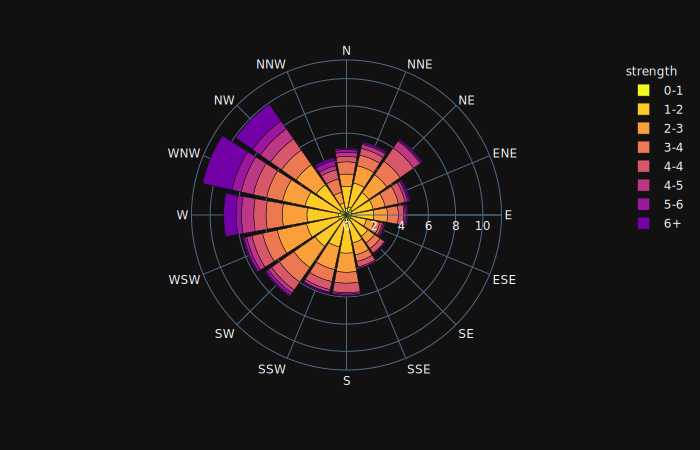

In [31]:
import plotly.express as px
df = px.data.wind()
fig = px.bar_polar(df, r="frequency", theta="direction", 
                   color="strength", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r
                  )

# color: https://plotly.com/python/builtin-colorscales/
fig.show(renderer="svg")
# fig.show()

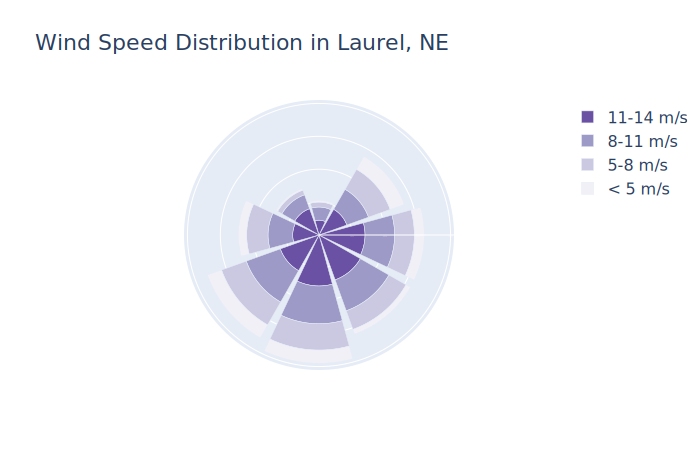

In [237]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Barpolar(
    r=[77.5, 72.5, 70.0, 45.0, 22.5, 42.5, 40.0, 62.5],
    name='11-14 m/s',
    marker_color='rgb(106,81,163)'
))
fig.add_trace(go.Barpolar(
    r=[57.5, 50.0, 45.0, 35.0, 20.0, 22.5, 37.5, 55.0],
    name='8-11 m/s',
    marker_color='rgb(158,154,200)'
))
fig.add_trace(go.Barpolar(
    r=[40.0, 30.0, 30.0, 35.0, 7.5, 7.5, 32.5, 40.0],
    name='5-8 m/s',
    marker_color='rgb(203,201,226)'
))
fig.add_trace(go.Barpolar(
    r=[20.0, 7.5, 15.0, 22.5, 2.5, 2.5, 12.5, 22.5],
    name='< 5 m/s',
    marker_color='rgb(242,240,247)'
))

fig.update_traces(text=['North', 'N-E', 'East', 'S-E', 'South', 'S-W', 'West', 'N-W'])
fig.update_layout(
    title='Wind Speed Distribution in Laurel, NE',
    font_size=16,
    legend_font_size=16,
    polar_radialaxis_ticksuffix='%',
    polar_angularaxis_rotation=90,

)



fig.show(renderer="svg")

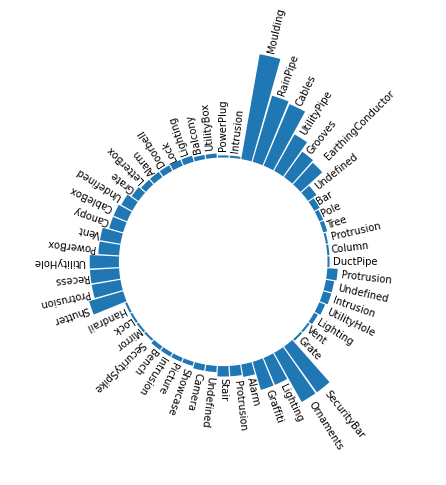

In [256]:
# https://stackoverflow.com/questions/46874689/
# getting-labels-on-top-of-bar-in-polar-radial-bar-chart-in-matplotlib-python3
from matplotlib import pyplot as plt
import numpy as np

lObjectsALLcnts = [1, 1, 1, 2, 2, 3, 5, 14, 15, 20, 32, 33, 51, 1, 1, 2, 2, 3, 3, 3, 3, 
                   3, 4, 6, 7, 7, 10, 10, 14, 14, 14, 17, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 
                   5, 5, 6, 14, 14, 27, 27, 1, 1, 2, 3, 4, 4, 5]

lObjectsALLlbls = ['DuctPipe', 'Column', 'Protrusion', 'Tree', 'Pole', 'Bar', 'Undefined', 
                   'EarthingConductor', 'Grooves', 'UtilityPipe', 'Cables', 'RainPipe', 'Moulding', 
                   'Intrusion', 'PowerPlug', 'UtilityBox', 'Balcony', 'Lighting', 'Lock', 'Doorbell', 
                   'Alarm', 'LetterBox', 'Grate', 'Undefined', 'CableBox', 'Canopy', 'Vent', 'PowerBox', 
                   'UtilityHole', 'Recess', 'Protrusion', 'Shutter', 'Handrail', 'Lock', 'Mirror', 
                   'SecuritySpike', 'Bench', 'Intrusion', 'Picture', 'Showcase', 'Camera', 
                   'Undefined', 'Stair', 'Protrusion', 'Alarm', 'Graffiti', 'Lighting', 'Ornaments', 
                   'SecurityBar', 
                   'Grate', 'Vent', 'Lighting', 'UtilityHole', 'Intrusion', 'Undefined', 'Protrusion']

iN = len(lObjectsALLcnts)
arrCnts = np.array(lObjectsALLcnts)

theta=np.arange(0,2*np.pi,2*np.pi/iN)
width = (2*np.pi)/iN *0.9
bottom = 50

rotations = np.rad2deg(theta)
y0,y1 = ax.get_ylim()

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
bars = ax.bar(theta, arrCnts, width=width, bottom=bottom)

plt.axis('off')

for x, bar, rotation, label in zip(theta, bars, rotations, lObjectsALLlbls):
     offset = (bottom+bar.get_height())/(y1-y0)
     lab = ax.text(0, 0, label, transform=None, 
             ha='center', va='center')
     renderer = ax.figure.canvas.get_renderer()
     bbox = lab.get_window_extent(renderer=renderer)
     invb = ax.transData.inverted().transform([[0,0],[bbox.width,0] ])
     lab.set_position((x,offset+(invb[1][0]-invb[0][0])/2.*2.7 ) )
     lab.set_transform(ax.get_xaxis_transform())
     lab.set_rotation(rotation)  
plt.show()

# 地圖 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [70]:
# https://datacatalog.worldbank.org/dataset/world-bank-official-boundaries
path = r"G:\我的雲端硬碟\python\地理圖資\WB_countries_Admin0_10m\WB_countries_Admin0_10m.shp"
WB_gdf = gpd.read_file(path)

In [8]:
# WB_gdf.head()

In [72]:
# WB_gdf.columns

In [73]:
# WB_gdf["REGION_WB"].unique()

In [74]:
# WB_gdf.crs

In [75]:
# WB_gdf[WB_gdf["REGION_WB"].isin(["East Asia & Pacific"])]["NAME_EN"].unique()

<AxesSubplot:>

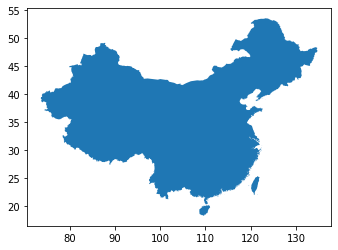

In [324]:
WB_gdf[WB_gdf["NAME_EN"].isin(["People's Republic of China"])].plot() # FUCK

In [76]:
OIE_case = {
# 'Indonesia':0,
#  'Malaysia':0,
 "People's Republic of China":12,
 'South Korea':24,
 'North Korea':0,
 'Mongolia':0,
 'Vietnam':37,
 'Cambodia':2,
 'Laos':2,
 'Hong Kong':3,
 'Philippines':8,
 'Japan':26,
 'Singapore':0,
}

In [77]:
# WB_gdf[WB_gdf["NAME_EN"].isin(OIE_case.keys())].plot()

In [78]:
WB_gdf.loc[:,"OIE_case"] = WB_gdf.loc[:,"NAME_EN"].apply(
                    lambda c: OIE_case[c] if c in OIE_case.keys() else np.nan)

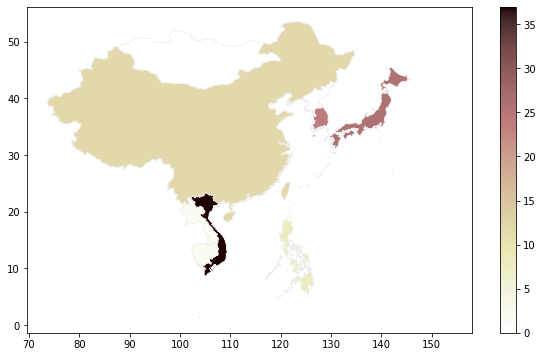

In [81]:
# set a variable that will call whatever column we want to visualise on the map
variable = "OIE_case"
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

WB_gdf[WB_gdf["NAME_EN"].isin(OIE_case.keys())].plot(column=variable, cmap="pink_r", linewidth=0.8, ax=ax, edgecolor="#EFEFEF")

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="pink_r", norm=plt.Normalize(vmin=WB_gdf.loc[:,"OIE_case"].min(), vmax=WB_gdf.loc[:,"OIE_case"].max()))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
#saving our map as .png file.
fig.savefig("Asia_map.svg")

## 台灣縣市界、鄉鎮區界(去除外島)

In [21]:
# # 縣市界圖
# taiwan_COUNTY_gdf = gpd.read_file(r'G:\我的雲端硬碟\python\地理圖資\0.縣市界圖\COUNTY_MOI_1090820.shp', 
#                       encoding='utf-8', 
#                      )

In [10]:
# 鄉鎮市區界界圖 
taiwan_TOWN_gdf = gpd.read_file(r'G:\我的雲端硬碟\python\地理圖資\1.鄉鎮市區界線(TWD97經緯度)\TOWN_MOI_1091016.shp', 
                      encoding='utf-8', 
                     )

In [19]:
# taiwan_COUNTY_gdf.head()
taiwan_TOWN_gdf.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40982 23.21369, 121.40984 23.213..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((120.54846 22.46067, 120.54853 22.460..."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((120.30198 23.81625, 120.30197 23.815..."
3,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ..."
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ..."


In [502]:
# df_group["countyname"].unique()

array(['嘉義縣', '屏東縣', '彰化縣', '臺中市', '臺南市', '雲林縣', '高雄市'], dtype=object)

<AxesSubplot:>

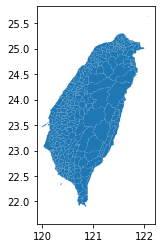

In [12]:
# 剔除 外島區域
mask = (~taiwan_TOWN_gdf['COUNTYNAME'].isin(["澎湖縣","金門縣","連江縣"])) & (~taiwan_TOWN_gdf['TOWNNAME'].isin(['旗津區',"綠島鄉","蘭嶼鄉","頭城鎮"]))
taiwan_TOWN_gdf[mask].plot()

In [ ]:
# 方法一 Clip 跑太久
# taiwan_COUNTY_gdf_clip = gpd.clip(taiwan_COUNTY_gdf, taiwan_TOWN_gdf[mask])

# # Ignore missing/empty geometries
# taiwan_COUNTY_gdf_clip = taiwan_COUNTY_gdf_clip[~taiwan_COUNTY_gdf_clip.is_empty]

# print("The clipped data have fewer line objects (represented by rows):",
#       taiwan_COUNTY_gdf_clip.shape, taiwan_COUNTY_gdf.shape)

<ipython-input-519-8f3402b0b20e>:2: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3824
Right CRS: None




<AxesSubplot:>

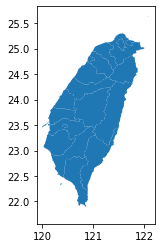

In [20]:
# 方法二 dissolve 跑一陣子
taiwan_TOWN_gdf_disslove = taiwan_TOWN_gdf[mask].dissolve(by='COUNTYNAME', aggfunc='sum')
taiwan_TOWN_gdf_disslove.plot()

In [48]:
taiwan_TOWN_gdf_disslove["COUNTYNAME"].unique()

array(['南投縣', '嘉義市', '嘉義縣', '基隆市', '宜蘭縣', '屏東縣', '彰化縣', '新北市', '新竹市',
       '新竹縣', '桃園市', '臺中市', '臺北市', '臺南市', '臺東縣', '花蓮縣', '苗栗縣', '雲林縣',
       '高雄市', nan], dtype=object)

In [61]:
# taiwan_TOWN_gdf_disslove[taiwan_TOWN_gdf_disslove["COUNTYNAME"].isin(['臺北市'])].plot()

In [22]:
# # 另存 shp 僅本島的縣市界圖
# taiwan_TOWN_gdf_disslove.to_file("taiwan_COUNTY_noFarIsland.shp")

In [23]:
# df 區分3個Wave
wave_month = {
    1:"Wave1",
    2:"Wave1",
    3:"Wave1",
    4:"Wave1",
    5:"Wave2",
    6:"Wave2",
    7:"Wave2",
    8:"Wave2",
    9:"Wave2",
    11:"Wave3",
    12:"Wave3",
             }

df_pic.loc[:,"Wave"] = df_pic.loc[:,"sample_date_month"].map(wave_month)
# # df to gdf
gdf_pic = gpd.GeoDataFrame(
    df_pic, geometry=gpd.points_from_xy(df_pic["lng"], df_pic["lat"]))

C:\Users\EMCT_Jeff\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [56]:
# 區別有發生案例紀錄的鄉鎮
# taiwan_TOWN_gdf_disslove = taiwan_TOWN_gdf_disslove.reset_index()
taiwan_TOWN_gdf_disslove.loc[:,"is_case"] = taiwan_TOWN_gdf_disslove.loc[: ,"COUNTYNAME"].apply(lambda c:True if c in df_group["countyname"].unique() else False)
taiwan_TOWN_gdf_disslove.loc[:,"color"] = taiwan_TOWN_gdf_disslove.loc[: ,"is_case"].apply(lambda TF: "#D6D6CA" if TF else "#E7E7DF")

C:\Users\EMCT_Jeff\anaconda3\lib\site-packages\geopandas\plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
C:\Users\EMCT_Jeff\anaconda3\lib\site-packages\geopandas\plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


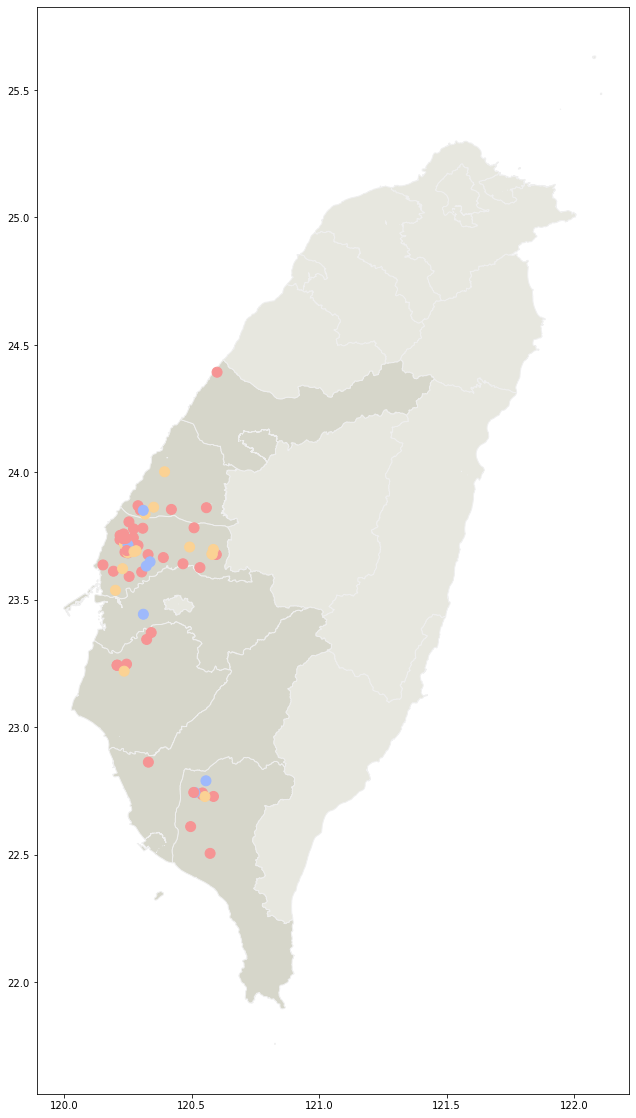

In [85]:
# set a variable that will call whatever column we want to visualise on the map
variable = "is_case"

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 20))

taiwan_TOWN_gdf_disslove.plot(
                                                    column=variable, 
                                                    color = taiwan_TOWN_gdf_disslove["color"],
#                                                      cmap=, 
                                                     linewidth=1, 
                                                     ax=ax, 
                                                     edgecolor="#EFEFEF"
                                                    )

gdf_pic["color"] = gdf_pic["Wave"].map({"Wave1":"#F69494","Wave2":"#FBD294","Wave3":"#9EB9FC",})
gdf_pic.plot(column="Wave", ax=ax,color=gdf_pic["color"],markersize=100)

#saving our map as .png file.
fig.savefig("taiwan_map.svg")